<a href="https://colab.research.google.com/github/gyiernahfufie/IMDB-Bechdel-Test/blob/main/IMDB_Bechedel_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://towardsdatascience.com/the-bechdel-test-analyzing-gender-disparity-in-hollywood-263cd4bcd9d

Data Pre-processing

In [62]:
#import data from bechdeltest
import urllib, json
import pandas as pd

In [63]:
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

In [64]:
df.head()

,imdbid,rating,id,title,year
0,3155794,0,9602,Passage de Venus,1874
1,14495706,0,9804,La Rosace Magique,1877
2,12592084,0,9806,Le singe musicien,1878
3,2221420,0,9603,Sallie Gardner at a Gallop,1878
4,7816420,0,9816,Athlete Swinging a Pick,1881


In [65]:
#filter data to only include movies from 1967 onwards
df_new = df[df['year'] >= 1967 ]

In [66]:
df_new.head()

,imdbid,rating,id,title,year
1219,0062990,3,4722,"Fox, The",1967
1220,0063278,1,2054,Marketa Lazarova,1967
1221,0062411,3,6714,Uchu daikaiju Girara,1967
1222,0061512,1,301,Cool Hand Luke,1967
1223,0061452,2,2664,Casino Royale,1967


In [67]:
#renaming rating column to bechdel_score 
df_new.rename(columns = {'rating' : 'bechdel_score'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
df_new.describe()

,bechdel_score,id,year
count,8053.000000,8053.000000,8053.000000
mean,2.188998,4985.263256,2003.885757
std,1.067537,2874.033068,12.759725
min,0.000000,1.000000,1967.000000
25%,1.000000,2521.000000,1997.000000
50%,3.000000,5035.000000,2008.000000
75%,3.000000,7439.000000,2013.000000
max,3.000000,10030.000000,2021.000000


In [69]:
df_new.dtypes

imdbid           object
bechdel_score     int64
id                int64
title            object
year              int64
dtype: object

In [70]:
#convert year column into date time object
df_new['year'] = pd.to_datetime(df_new['year'], format = '%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
df_new.dtypes

imdbid                   object
bechdel_score             int64
id                        int64
title                    object
year             datetime64[ns]
dtype: object

In [72]:
#updating bechdel score to categorical
df_new['bechdel_score'] = df_new['bechdel_score'].astype('category', copy = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Data Visualization

In [73]:
import seaborn as sns

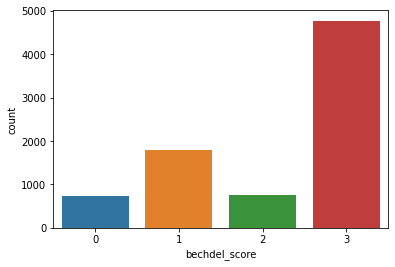

In [74]:
sns.countplot(x = 'bechdel_score', data = df_new)

In [75]:
#creating new column to check if movies passed bechdel test
li = []
for i in df_new['bechdel_score']:
  if(i<3):
    li.append(0)
  else:
    li.append(1)
df_new['pass_test'] = li
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,imdbid,bechdel_score,id,title,year,pass_test
1219,0062990,3,4722,"Fox, The",1967-01-01,1
1220,0063278,1,2054,Marketa Lazarova,1967-01-01,0
1221,0062411,3,6714,Uchu daikaiju Girara,1967-01-01,1
1222,0061512,1,301,Cool Hand Luke,1967-01-01,0
1223,0061452,2,2664,Casino Royale,1967-01-01,0


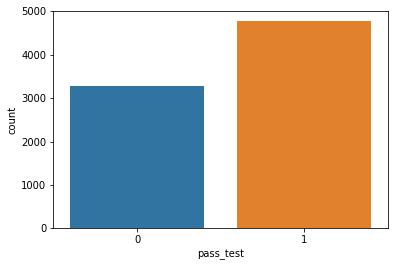

In [76]:
sns.countplot(x = 'pass_test', data = df_new)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


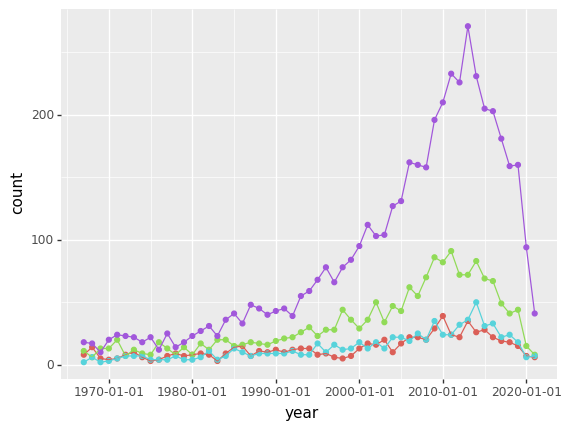

<ggplot: (8753829452509)>

In [94]:
from plotnine import *

(ggplot(df_new) + 
 geom_point(aes('year',color=df_new['bechdel_score']),
 stat='count',show_legend=False) +
 geom_line(aes('year',color=df_new['bechdel_score']),
stat='count',show_legend=False))

In [78]:
imdb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_top_1000.csv')

In [79]:
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [80]:
imdb.rename(columns = {'Series_Title' : 'title'}, inplace = True)

In [81]:
imdb_new = imdb[['title','IMDB_Rating']]

In [82]:
#left join IMDB and Bechdel data together
df_new2 = pd.merge(df_new, imdb_new, how = 'left', left_on = ['title'], right_on = ['title'])

In [83]:
df_new2.head()

,imdbid,bechdel_score,id,title,year,pass_test,IMDB_Rating
0,0062990,3,4722,"Fox, The",1967-01-01,1,NaN
1,0063278,1,2054,Marketa Lazarova,1967-01-01,0,NaN
2,0062411,3,6714,Uchu daikaiju Girara,1967-01-01,1,NaN
3,0061512,1,301,Cool Hand Luke,1967-01-01,0,8.1
4,0061452,2,2664,Casino Royale,1967-01-01,0,8.0


In [86]:
#Drop rows with null values
df_new2 = df_new2.dropna()

In [92]:
df_new2.dtypes

imdbid                   object
bechdel_score          category
title                    object
year             datetime64[ns]
pass_test                 int64
IMDB_Rating             float64
dtype: object

In [91]:
df_new2.isna().sum()

imdbid           0
bechdel_score    0
title            0
year             0
pass_test        0
IMDB_Rating      0
dtype: int64

In [87]:
df_new2 = df_new2.drop('id', axis = 1)

In [89]:
#creates new df with only year, bechdel score and imdb rating
df_new3 = df_new2.groupby(['year','bechdel_score']).agg({'IMDB_Rating':'mean'}).reset_index()

In [90]:
df_new3.head()

,year,bechdel_score,IMDB_Rating
0,1967-01-01,0,NaN
1,1967-01-01,1,8.0
2,1967-01-01,2,8.0
3,1967-01-01,3,7.8
4,1968-01-01,0,8.3


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 51 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


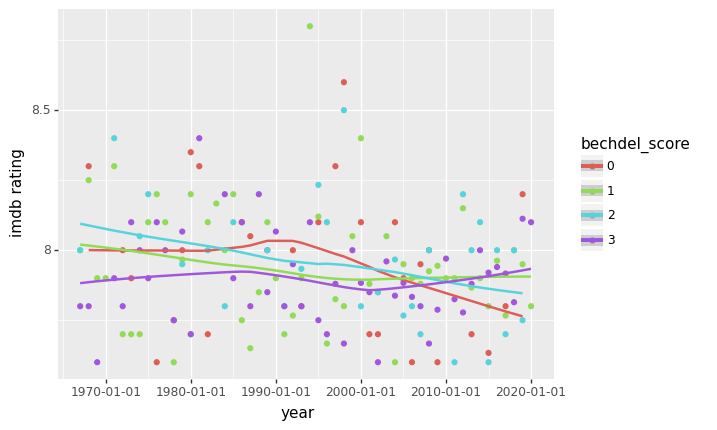

<ggplot: (8753829435373)>

In [102]:
(ggplot(df_new3,aes(x='year',y='IMDB_Rating',color='bechdel_score'))+ 
geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating"))

Relationship between gender of director and bechdel score

In [109]:
!pip install gender-guesser
import  gender_guesser.detector as gen

     |████████████████████████████████| 379 kB 5.4 MB/s 


In [113]:
imdb_gen = imdb[['title','Director']]

In [114]:
df_new4 = pd.merge(df_new2, imdb_gen, how = 'left',
                   left_on = ['title'], right_on = ['title'])

In [115]:
df_new4.head()

,imdbid,bechdel_score,title,year,pass_test,IMDB_Rating,Director
0,0061512,1,Cool Hand Luke,1967-01-01,0,8.1,Stuart Rosenberg
1,0061452,2,Casino Royale,1967-01-01,0,8.0,Martin Campbell
2,0062467,3,Wait Until Dark,1967-01-01,1,7.8,Terence Young
3,0061811,1,In the Heat of the Night,1967-01-01,0,7.9,Norman Jewison
4,0061418,3,Bonnie and Clyde,1967-01-01,1,7.8,Arthur Penn


In [116]:
df_new4 = df_new4.dropna()

In [118]:
#Predict gender of director using first name:
d = gen.Detector()
genders = []
firstnames = df_new4['Director'].str.split().str.get(0)
for i in firstnames[0:len(firstnames)]:
  if d.get_gender(i) == 'male':
    genders.append('male')
  elif d.get_gender(i) == 'female':
    genders.append('female')
  else:
    genders.append('unknown')

In [120]:
df_new4['gender'] = genders
df_new4 = df_new4[df_new4['gender'] != 'unknown']

In [121]:
#encoding gender variable
df_new4['male'] = df_new4['gender'].map({'male':1, 'female':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
df_new4.head()

,imdbid,bechdel_score,title,year,pass_test,IMDB_Rating,Director,gender,male
0,0061512,1,Cool Hand Luke,1967-01-01,0,8.1,Stuart Rosenberg,male,1
1,0061452,2,Casino Royale,1967-01-01,0,8.0,Martin Campbell,male,1
2,0062467,3,Wait Until Dark,1967-01-01,1,7.8,Terence Young,male,1
3,0061811,1,In the Heat of the Night,1967-01-01,0,7.9,Norman Jewison,male,1
4,0061418,3,Bonnie and Clyde,1967-01-01,1,7.8,Arthur Penn,male,1


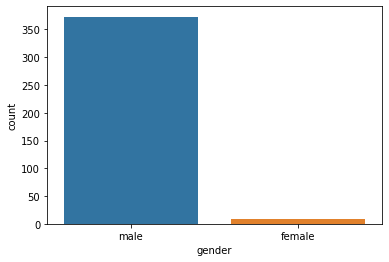

In [123]:
sns.countplot(x = 'gender', data = df_new4)

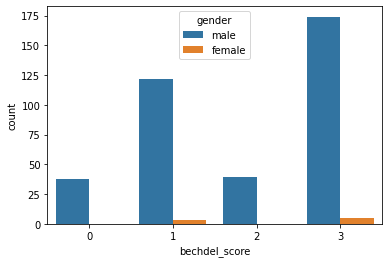

In [124]:
sns.countplot(x = 'bechdel_score', hue = 'gender', data = df_new4)